<a href="https://colab.research.google.com/github/jsleocadio/-IMD0184---APRESENTACAO-E-ANALISE-ESTATISTICA-DE-DADOS/blob/main/Guia_3___Jefferson_Leocadio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Variável resposta – Existe necessidade de alterar e/ou complementar a variável resposta?
Às vezes, uma variável só não faz o papel de resposta sozinha. Ou então ela precisou ser repensada diante de algum problema ou alteração de
objetivos de estudo. Faça uma avaliação da sua variável resposta e coloque abaixo se manteve ou se alterou. Também pode acrescentar novas
análises dessa variável se necessário. Se adicionou nova variável ou fez alterações, responda novamente:
* Justifique a sua escolha relacionando com o problema e as hipóteses que guiam o seu trabalho;
* Qual o tipo da sua variável? Quantitativa ou Qualitativa?
* Qual o domínio da sua variável ou quais as categorias ela possui?

Escolhi novas mortes pois quero verificar se houve redução nas mortes por covid.
Esta variável é do tipo quantitativa. Possuindo as seguintes informações:

In [6]:
import pandas as pd
import numpy as np
from plotly import express as px
from matplotlib import pyplot as plt
from matplotlib import dates
from datetime import datetime

In [9]:
filename = 'https://raw.githubusercontent.com/jsleocadio/Signal-Digital-Processing/main/Project_01/2022-09-28_Covid-Bra.csv'
df = pd.read_csv(filename, parse_dates=['date'])
df['new_deaths'].describe()

count     924.000000
mean      742.435065
std       742.791153
min         0.000000
25%       201.750000
50%       542.000000
75%      1063.000000
max      4148.000000
Name: new_deaths, dtype: float64

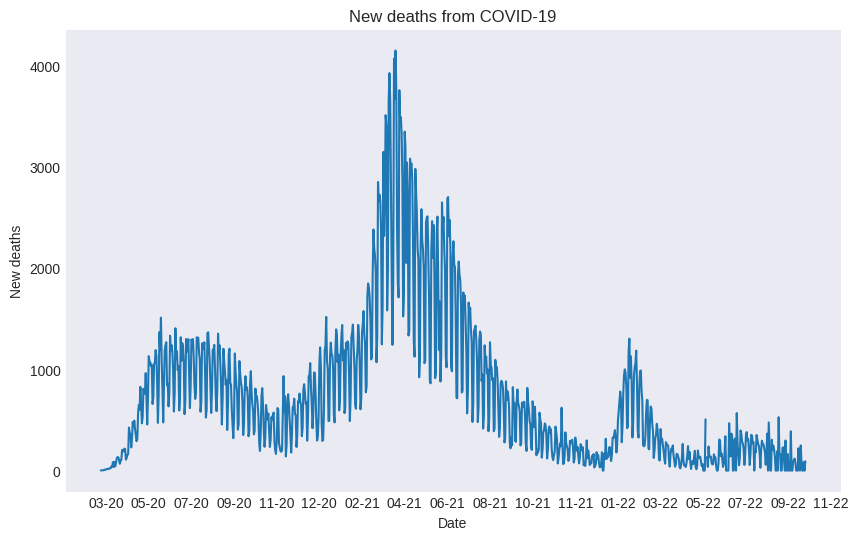

In [16]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10,6))

# Add x-axis and y-axis
ax.plot(df['date'],df['new_deaths'])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="New deaths",
       title="New deaths from COVID-19")

# Define the date format
date_form = dates.DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each 8 week using (interval=8)
ax.xaxis.set_major_locator(dates.WeekdayLocator(interval=8))
plt.show()

###Variável(eis) Explicativa(s) – Vamos fazer um detalhamento de cada uma?
Você alterou as variáveis explicativas? Acrescentou alguma? Construiu alguma? Por quê?
* Aqui você vai detalhar toda(s) a(s) variável(eis) explicativa(s) que você listou na atividade anterior. Faça uma análise descritiva de cada
uma delas. Não tem limite de espaço. Construa medidas de resumo (média, moda, desvio, etc) bem como tabelas e gráficos.
* Você identifica algum problema com alguma delas? Tem outliers? Possui valores faltantes? Precisa de algum tipo de padronização?
* Considere inclusive as variáveis que você construiu. Por exemplo, Ganho de Peso = Peso Final – Peso Inicial. Como ela se comporta?
Quais medidas resumem essas variáveis? Calcule Intervalos de Confiança para a média daquelas variáveis quantitativas que você definiu

In [10]:
df['stringency_index'].describe()

count    937.000000
mean      54.098901
std       18.488165
min        5.560000
25%       34.890000
50%       57.870000
75%       69.910000
max       81.020000
Name: stringency_index, dtype: float64

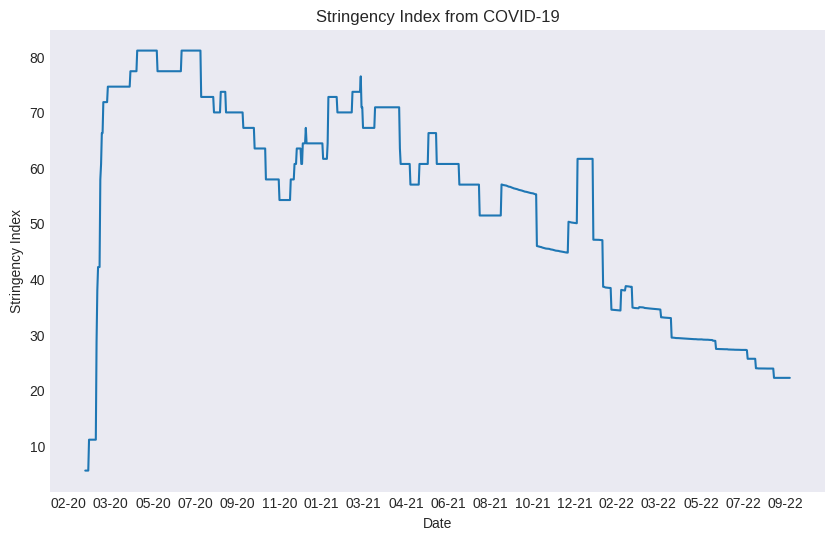

In [11]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10,6))

# Add x-axis and y-axis
ax.plot(df['date'],df['stringency_index'])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Stringency Index",
       title="Stringency Index from COVID-19")

# Define the date format
date_form = dates.DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each 8 week using (interval=8)
ax.xaxis.set_major_locator(dates.WeekdayLocator(interval=8))
plt.show()

In [23]:
df['people_vaccinated'].describe()

count    5.670000e+02
mean     1.225035e+08
std      6.723991e+07
min      1.120000e+02
25%      5.094183e+07
50%      1.588907e+08
75%      1.809798e+08
max      1.873277e+08
Name: people_vaccinated, dtype: float64

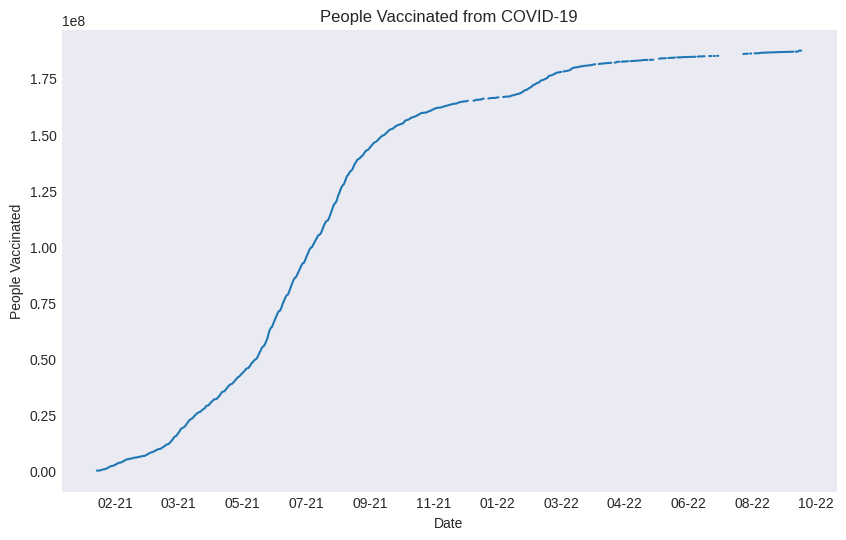

In [24]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10,6))

# Add x-axis and y-axis
ax.plot(df['date'],df['people_vaccinated'])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="People Vaccinated",
       title="People Vaccinated from COVID-19")

# Define the date format
date_form = dates.DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each 8 week using (interval=8)
ax.xaxis.set_major_locator(dates.WeekdayLocator(interval=8))
plt.show()

###Limpeza/ Correção/ Filtragem/ Normalização/ Padronização
Nesta etapa deve-se buscar extrair qualquer elemento que possa influenciar uma análise conclusiva dos dados no sentido de resolver o problema que
você escolheu. Existe algum outlier? Como tratá-lo? As classes são desbalanceadas? Como resolver? Tem muito dado faltante? O que isso afeta suas
análises? Descreva se existe essa necessidade ou se nenhum problema foi observado nessa fase. Só uma observação: Cada variável alterada deve
ser estudada novamente após a alteração.


Afim de reduzir o ruído produzido pela grande quantidade de dados no dados 'novas mortes' iremos aplicar um filtro chamado média móvel com uma janela de 7 dias.

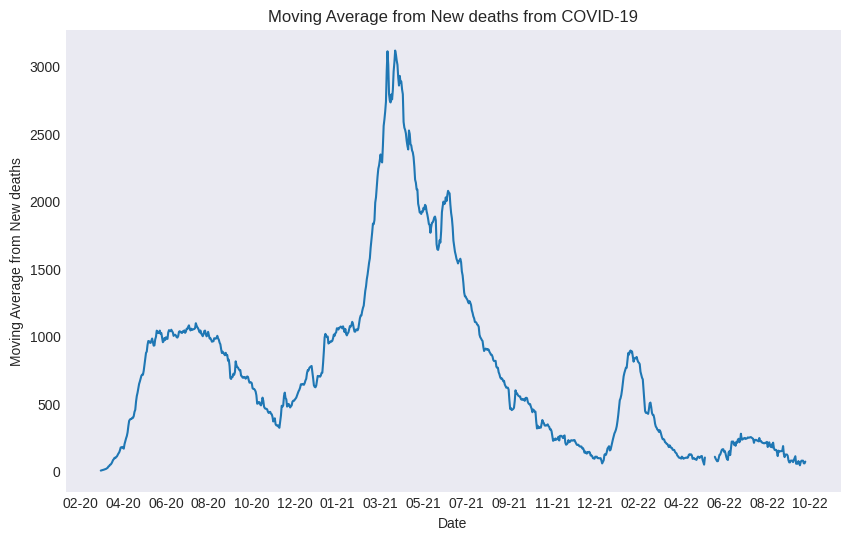

In [17]:
# creating a vector h
N = 7
h = np.ones(N)/N

# convoluctioning
y = np.convolve(df['new_deaths'], h)
y = y[0:len(df['new_deaths'])]

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10,6))

# Add x-axis and y-axis
ax.plot(df['date'],y)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Moving Average from New deaths",
       title="Moving Average from New deaths from COVID-19")

# Define the date format
date_form = dates.DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each 8 week using (interval=8)
ax.xaxis.set_major_locator(dates.WeekdayLocator(interval=8))
plt.show()

###Estudo da Correlação e/ou Associação entre variáveis
Nesta etapa deve-se buscar compreender como é a associação entre a variável resposta e cada uma das variáveis explicativas que você definiu.
Como se comportam quando analisadas duas a duas? Construa tabelas e/ou gráficos e/ou medidas-resumo que possam identificar quais variáveis
estão mais relacionadas com a variável resposta. Você pode chegar à conclusão de que é necessário executar o mesmo procedimento entre variáveis
explicativas. Utilize todas as ferramentas que sejam necessárias para realizar essa atividade.

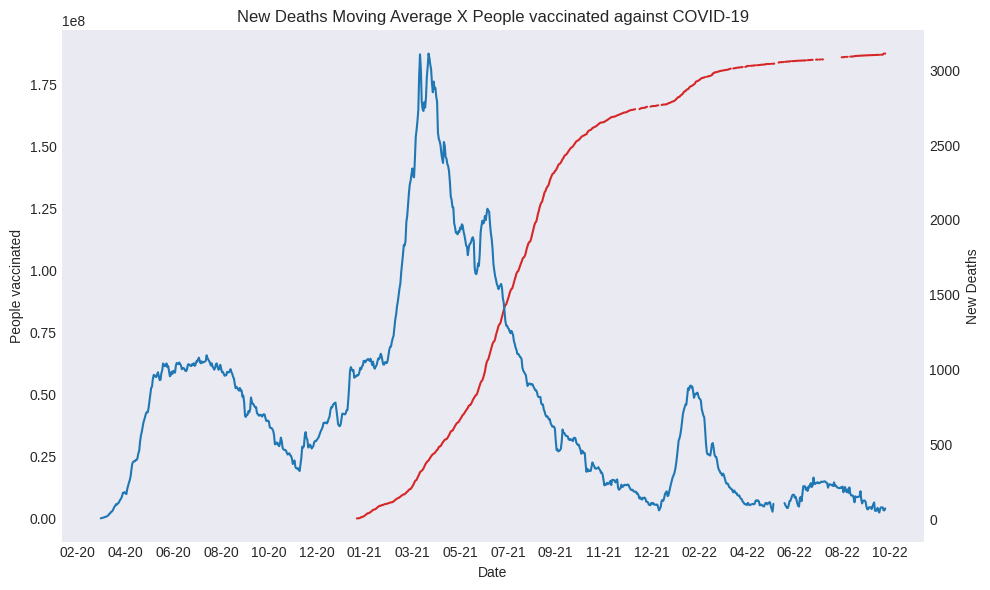

In [25]:
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:red'

# Add x-axis and y-axis
ax1.plot(df['date'],df['people_vaccinated'], color=color)


# Set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="People vaccinated",
       title="New Deaths Moving Average X People vaccinated against COVID-19")

# Define the date format
date_form = dates.DateFormatter("%m-%y")
ax1.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each 8 week using (interval=8)
ax1.xaxis.set_major_locator(dates.WeekdayLocator(interval=8))

ax2 = ax1.twinx()

color = 'tab:blue'

ax2.set(ylabel="New Deaths")
ax2.plot(df['date'],y, color=color)

fig.tight_layout()
plt.show()

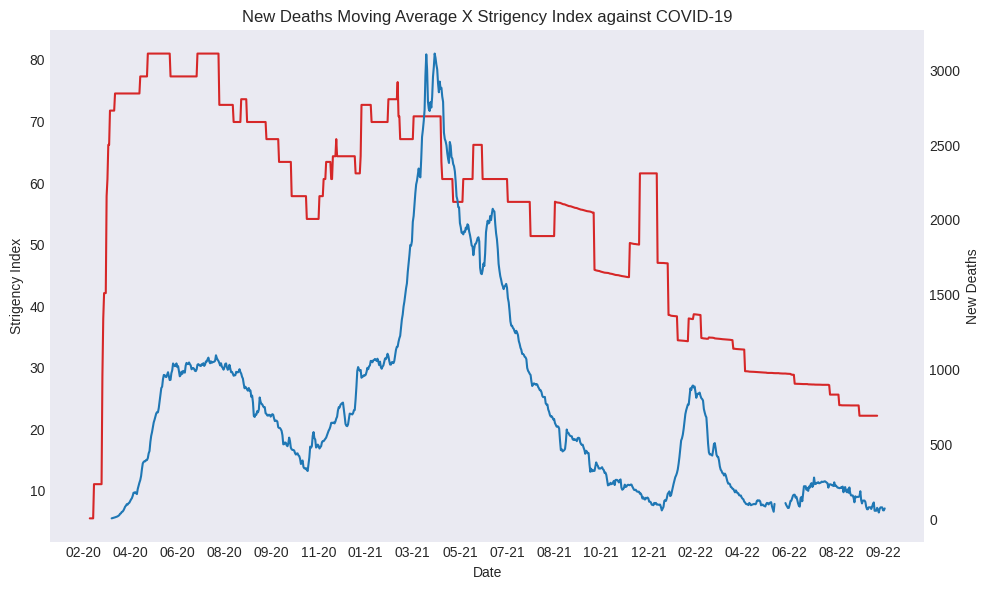

In [26]:
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:red'

# Add x-axis and y-axis
ax1.plot(df['date'],df['stringency_index'], color=color)


# Set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="Strigency Index",
       title="New Deaths Moving Average X Strigency Index against COVID-19")

# Define the date format
date_form = dates.DateFormatter("%m-%y")
ax1.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each 8 week using (interval=8)
ax1.xaxis.set_major_locator(dates.WeekdayLocator(interval=8))

ax2 = ax1.twinx()

color = 'tab:blue'

ax2.set(ylabel="New Deaths")
ax2.plot(df['date'],y, color=color)

fig.tight_layout()
plt.show()

###Traduzindo – O que tudo isso quis dizer?
O objetivo aqui será a síntese do que se obteve com as análises da variável resposta, das variáveis explicativas e da análise de relacionamento entre
essas variáveis de forma textual, relacionando com o tema, problema e hipóteses do seu trabalho.


Podemos verificar através dos gráficos que a taxa de rigidez (Stringency Index) não foi tão efetiva para o combate da COVID pois mesmo quando a rigidez estava alta, o número de novas mortes estava também alto, porém, quando relacionamos as novas mortes com o número de pessoas vacinadas, podemos observar uma inversão nos gráficos, indicando que quando as pessoas se vacinavam, o número de novas mortes por Coronavírus também reduzia.